In [1]:
import pandas as pd
import numpy as np
import sklearn.cluster as sklc
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('features.csv')

In [3]:
df

,fname,alt_max,vert_acc,horiz_speed,dist,is_maneuver,rcs
0,./data/traj02.csv,8274.327328,-0.304531,3078.942857,20.906922,1,69.952993
1,./data/traj03.csv,8329.930527,0.038225,1884.674858,10.305852,1,81.733552
2,./data/traj04.csv,8291.285689,-0.384100,1882.693659,11.836522,1,80.851593
3,./data/traj05.csv,8280.694341,1.016257,1245.357077,6.527431,1,75.857357
4,./data/traj06.csv,8353.424287,-0.044607,2297.555352,15.443727,1,77.177848
5,./data/traj07.csv,8318.048355,-0.181455,7186.016059,30.272157,1,87.900108
6,./data/traj08.csv,8269.332899,-0.042418,5227.561595,27.218390,1,80.573815
7,./data/traj09.csv,8241.180683,0.241187,2438.956013,4.150869,1,81.842127
8,./data/traj10.csv,8296.437999,-0.198269,3336.196525,19.508315,1,84.096280
9,./data/traj12.csv,3347.743074,2.406948,1056.276914,1.332238,1,3.341739


In [4]:
df.describe()

,alt_max,vert_acc,horiz_speed,dist,is_maneuver,rcs
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,14404.267188,-2.090068,1873.813710,9.529846,0.600000,19.602296
std,16297.866678,4.065783,1548.427553,8.747916,0.495434,31.124947
min,3175.896593,-10.000000,36.173055,0.031589,0.000000,0.009198
25%,5109.316341,-1.493588,794.924374,1.550007,0.000000,0.099814
50%,8291.285689,-0.042418,1882.693659,9.196222,1.000000,3.012826
75%,9507.677763,0.005385,2681.047584,17.989736,1.000000,16.298099
max,46359.963936,2.406948,7186.016059,30.272157,1.000000,87.900108


In [5]:
scaler = MinMaxScaler()

In [6]:
df_matrix = scaler.fit_transform(df.drop(['fname'], axis = 1).values)

In [7]:
df_matrix = np.asarray(df_matrix)

In [8]:
clus = sklc.KMeans(5, n_init = 100, max_iter = 2000, algorithm = 'elkan').fit(df_matrix)

In [9]:
kmeans_labels = clus.labels_

In [10]:
clus.n_iter_

2

In [11]:
df['clus_id'] = kmeans_labels

In [12]:
groups = df.groupby(['clus_id'])

In [13]:
groups.count()

,fname,alt_max,vert_acc,horiz_speed,dist,is_maneuver,rcs
clus_id,,,,,,,
0,9,9,9,9,9,9,9
1,9,9,9,9,9,9,9
2,9,9,9,9,9,9,9
3,9,9,9,9,9,9,9
4,9,9,9,9,9,9,9


In [14]:
groups.mean()

,alt_max,vert_acc,horiz_speed,dist,is_maneuver,rcs
clus_id,,,,,,
0,8294.962457,0.015588,3175.328222,16.241132,1,79.998408
1,46359.963936,-10.000000,158.410334,0.138206,0,0.010316
2,3267.586353,-0.467481,991.031663,1.572178,1,3.034102
3,5096.315779,-0.002494,1935.725201,14.024633,0,14.864533
4,9002.507414,0.004045,3108.573130,15.673079,1,0.104120


In [62]:
groups.get_group(3)

,fname,alt_max,vert_acc,horiz_speed,dist,is_maneuver,rcs,clus_id
36,./data/traj52.csv,5158.342804,0.003542,1387.542779,10.873149,0,16.298099,3
37,./data/traj53.csv,5229.331871,-0.001140,1980.712700,12.381634,0,15.838483,3
38,./data/traj54.csv,4814.995963,0.000000,256.230755,5.450097,0,13.341512,3
39,./data/traj55.csv,5177.663278,-0.006874,2681.047584,20.714598,0,10.730651,3
40,./data/traj56.csv,5184.052731,-0.014708,3683.804297,22.870708,0,13.386065,3
41,./data/traj57.csv,5109.316341,-0.005051,3004.171012,19.235715,0,15.723431,3
42,./data/traj58.csv,4868.714661,0.000000,264.745372,8.576796,0,16.633941,3
43,./data/traj59.csv,5198.008964,-0.004466,2050.808705,13.096723,0,17.179832,3
44,./data/traj60.csv,5126.415394,0.006253,2112.463601,13.022279,0,14.648780,3


In [16]:
X_embedded = TSNE(n_components = 2).fit_transform(df_matrix)

In [23]:
num_clus = 5

In [24]:
l = []
for i in range(num_clus):
    new_list = []
    l.append(new_list)
for i, x in enumerate(X_embedded):
    l[kmeans_labels[i]].append(x)
for i in range(num_clus):
    l[i] = np.asarray(l[i])

In [25]:
l = np.asarray(l)

In [26]:
l

array([[[ 121.22757   ,   25.027203  ],
        [ 162.8978    ,    4.009802  ],
        [  90.19334   ,   92.26044   ],
        [ 147.75615   ,  -42.31964   ],
        [ 109.31257   ,   58.185192  ],
        [ 181.68246   ,   78.8917    ],
        [ 139.85149   ,   91.317795  ],
        [ 123.101494  ,  -12.975659  ],
        [ 153.53516   ,   46.176304  ]],

       [[-180.50612   ,   17.258148  ],
        [-186.42882   ,  -22.805157  ],
        [-221.3657    ,   -5.4022613 ],
        [-147.08122   ,  -87.346985  ],
        [-216.67662   ,  -50.38807   ],
        [-148.41756   ,  -12.142688  ],
        [-192.4093    ,  -84.57072   ],
        [-167.92793   ,  -52.813644  ],
        [-128.12157   ,  -47.505653  ]],

       [[  76.70577   ,  -90.424     ],
        [ -38.370483  ,  -68.70909   ],
        [  12.469612  ,   64.52233   ],
        [  -7.297674  ,  -39.576504  ],
        [   4.3763137 ,  -72.53993   ],
        [  24.58607   , -110.64938   ],
        [ -20.11196   , -105.851555 

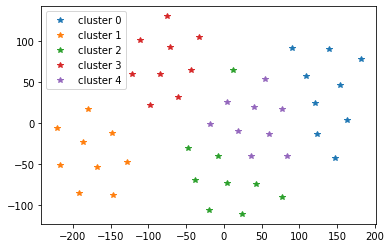

In [28]:
import matplotlib.pyplot as plt
for i,x in enumerate(l):
    plt.plot(x[:,0], x[:,1], '*', label = 'cluster '+ str(i))
plt.legend()
plt.show()

In [36]:
test = pd.read_csv('test_features.csv')

In [37]:
test

,fname,alt_max,vert_acc,horiz_speed,dist,is_maneuver,rcs
0,./test_files/traj1.csv,8281.973221,-0.324512,1398.000923,7.190764,1,91.837843
1,./test_files/traj11.csv,3286.929710,0.306735,876.349493,4.160539,1,2.821894
2,./test_files/traj21.csv,46359.963936,-10.000000,151.054206,0.131327,0,0.010366
3,./test_files/traj31.csv,8067.899640,0.000000,2807.989766,15.844100,0,0.104709
4,./test_files/traj51.csv,5224.666985,-0.000926,2294.973087,13.605878,0,13.527322


In [42]:
clus.predict(scaler.transform(test.drop(['fname'],axis =1).values))

array([0, 2, 1, 3, 3], dtype=int32)

In [48]:
TS2d = TSNE(n_components = 2).fit_transform(scaler.transform(test.drop(['fname'],axis =1).values))
TS3d = TSNE(n_components = 3).fit_transform(scaler.transform(test.drop(['fname'],axis =1).values))

In [ ]:
main_df = pd.read_csv('features.csv')

In [ ]:
main_df

In [ ]:
df['dist'] = np.sqrt(main_df['dist'])

In [ ]:
main_df['horiz_speed'] *= 111000
main_df['dist'] *= 111000

In [ ]:
main_df['clus_id'] = kmeans_labels

In [54]:
plot_df = pd.DataFrame()

In [55]:
plot_df['filename'] = test['fname']

In [56]:
plot_df['x'] = TS3d[:,0]
plot_df['y'] = TS3d[:,1]
plot_df['z'] = TS3d[:,2]

In [57]:
plot_df['clus_id'] = clus.predict(scaler.transform(test.drop(['fname'],axis =1).values))

In [58]:
plot_df.to_csv('tsne_3d_plot_final.csv', index = False)